
### APPLIED MACHINE LEARNING PROJECT - IA651
## LOAN APPROVAL PREDICTION USING MACHINE LEARNING 

## Import all the necessary Libraries

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedGroupKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # type: ignore
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import dtale




## LOADING THE DATA

Our data is in two separate csv's, train and test, Loading the data

In [294]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_original = train.copy()
test_original = test.copy()

## Exploratory Data Analysis

In [295]:
dtale.show(train)

In [296]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [297]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [298]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [299]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [300]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [301]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [302]:
train.shape

(614, 13)

In [303]:
test.shape

(367, 12)

In [304]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [305]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [306]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [307]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

## Univariate Analysis

### Analyze each variable individually

In [308]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [309]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

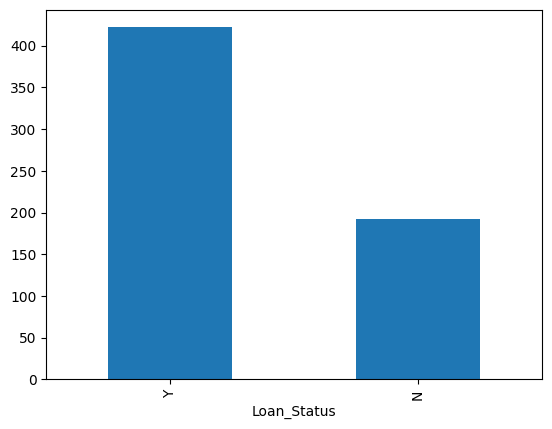

In [310]:
train['Loan_Status'].value_counts().plot.bar()

# Visualize the categorical features

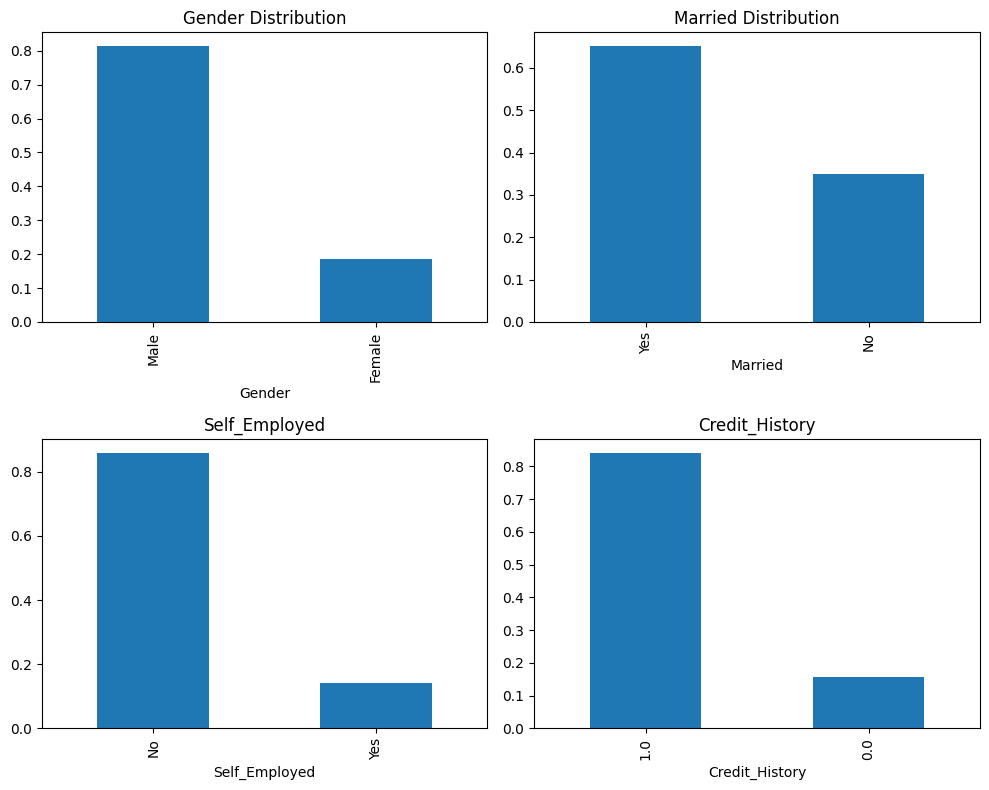

In [311]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

train['Gender'].value_counts(normalize=True).plot.bar(ax = axs[0, 0], title='Gender Distribution')
train['Married'].value_counts(normalize=True).plot.bar(ax = axs[0, 1], title='Married Distribution')
train['Self_Employed'].value_counts(normalize=True).plot.bar(ax = axs[1, 0], title='Self_Employed')
train['Credit_History'].value_counts(normalize=True).plot.bar(ax = axs[1, 1], title='Credit_History')


plt.tight_layout()
plt.show()



<Axes: title={'center': 'Education'}, xlabel='Education'>

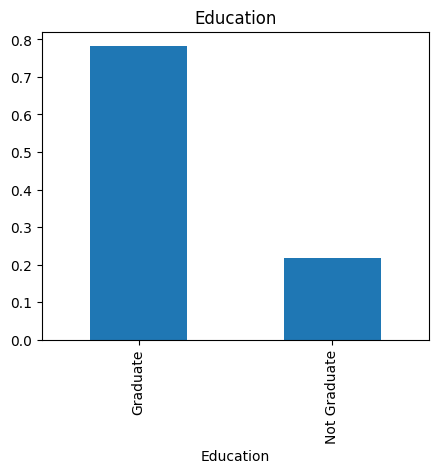

In [312]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(5,4),title='Education')

## VISUALIZE THE ORDINAL FEATURES

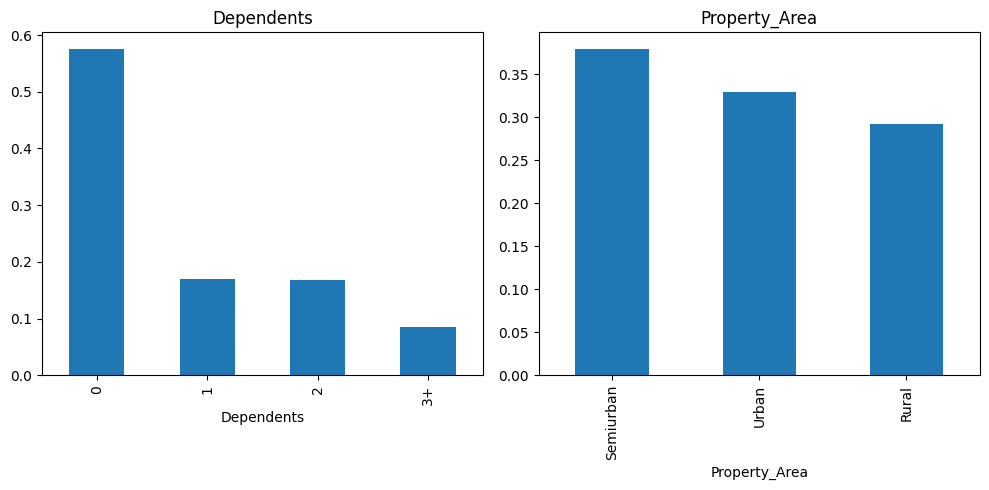

In [313]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

train['Dependents'].value_counts(normalize=True).plot.bar(ax = axs[0], title='Dependents')
train['Property_Area'].value_counts(normalize=True).plot.bar(ax = axs[1], title='Property_Area')

plt.tight_layout()
plt.show()

## VISUALIZE THE NUMERICAL FEATURES

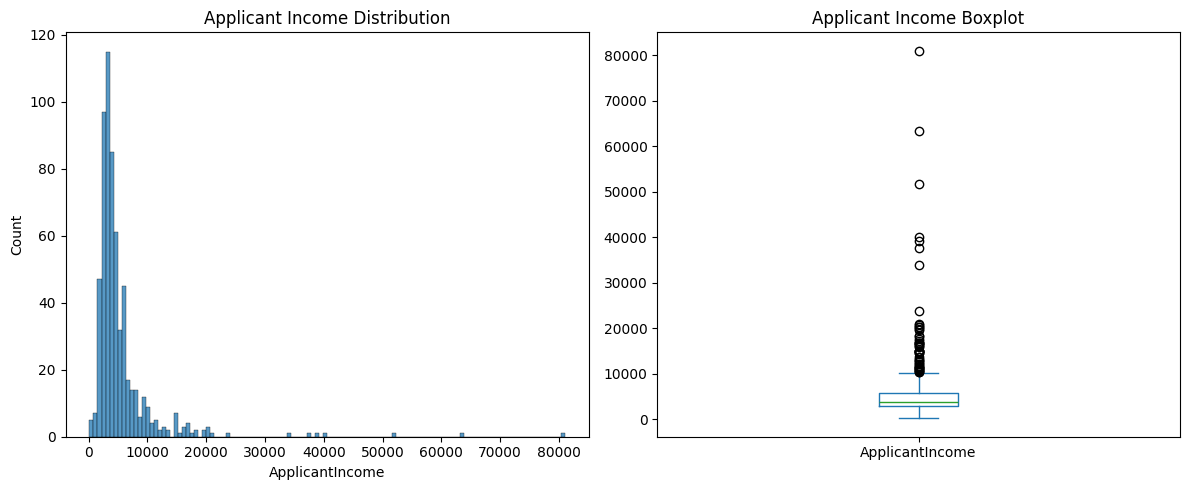

In [314]:
#Visualize Numerical Variables
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train['ApplicantIncome'], ax = axs[0])
axs[0].set_title('Applicant Income Distribution')

train['ApplicantIncome'].plot.box(ax = axs[1])
axs[1].set_title('Applicant Income Boxplot')

plt.tight_layout()
plt.show()

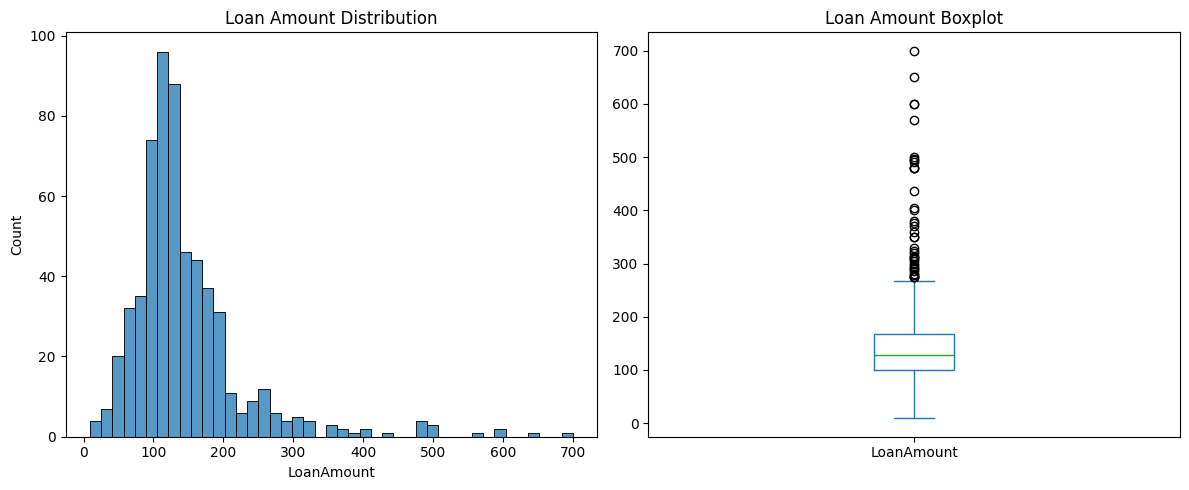

In [315]:
#Visualize Numerical Variables
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train['LoanAmount'], ax = axs[0])
axs[0].set_title('Loan Amount Distribution')

train['LoanAmount'].plot.box(ax = axs[1])
axs[1].set_title('Loan Amount Boxplot')

plt.tight_layout()
plt.show()

# Bivariate Analysis

## Categorical Independent Variable Vs Target Variable

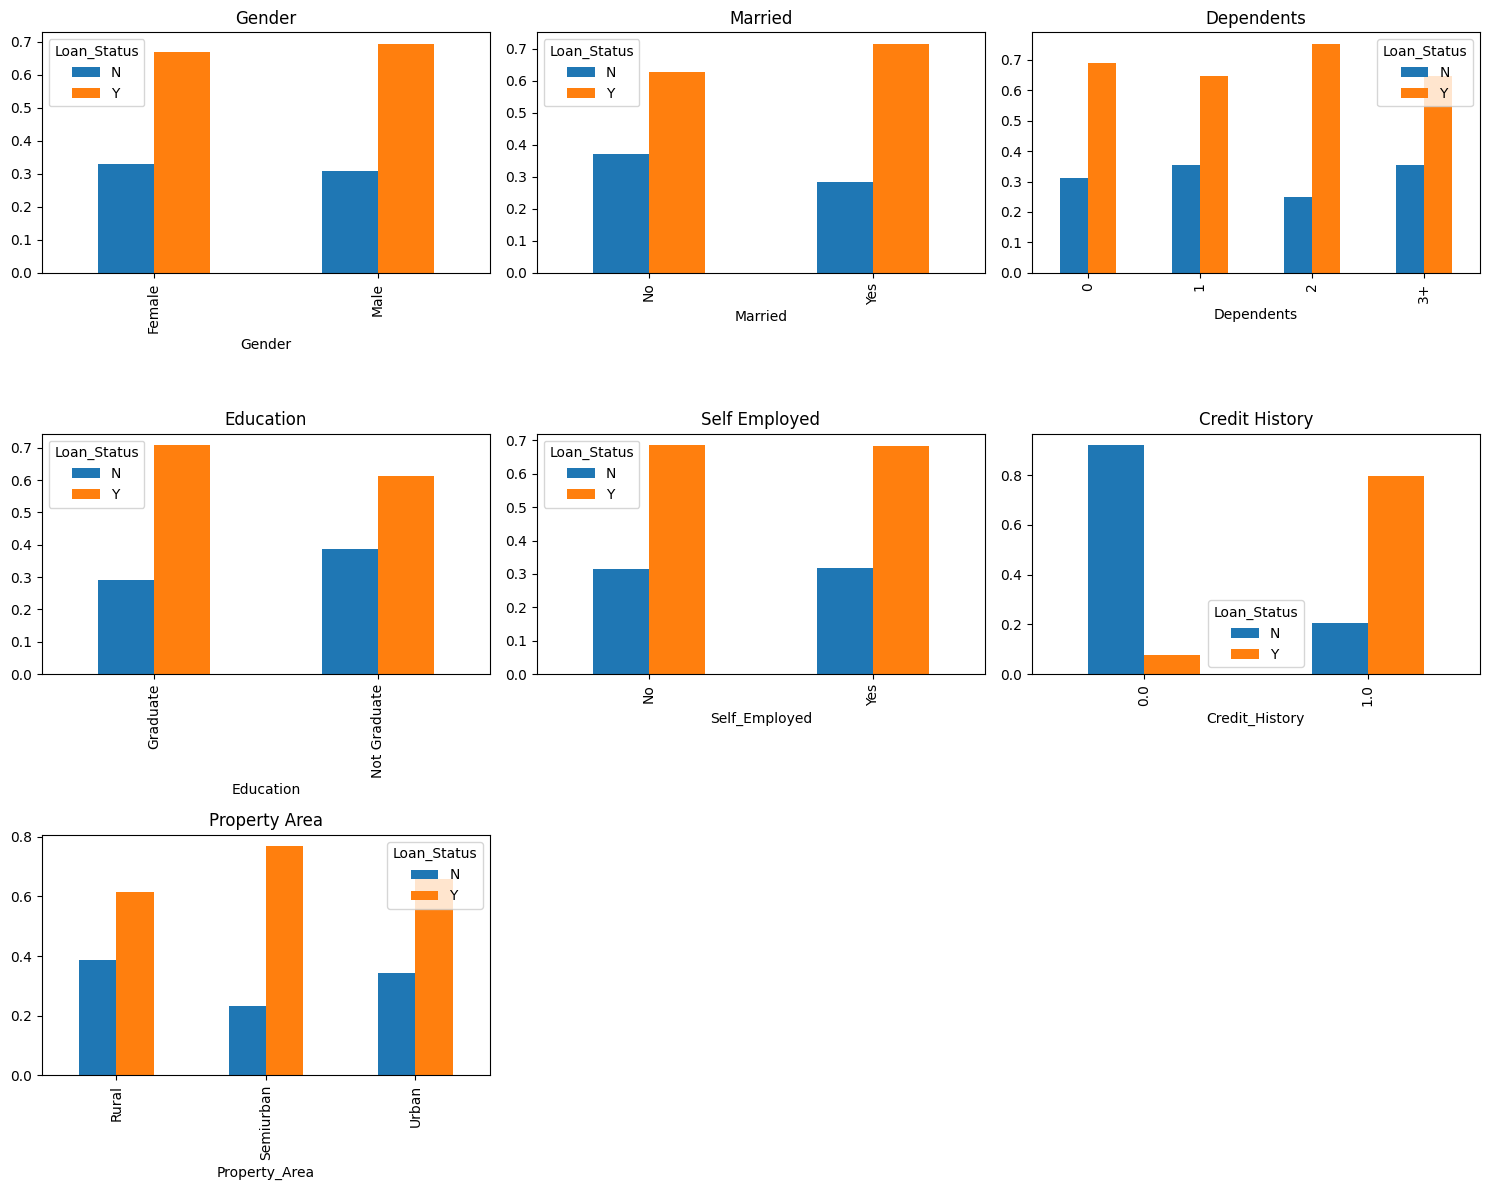

In [316]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Gender
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[0, 0], title='Gender')

# Married
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[0, 1], title='Married')

# Dependents
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[0, 2], title='Dependents')

# Education
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[1, 0], title='Education')

# Self Employed
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[1, 1], title='Self Employed')

# Credit History
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[1, 2], title='Credit History')

# Property Area
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", ax=axs[2, 0], title='Property Area')

# Remove empty subplot
axs[2, 1].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


## Visualize Numerical Independent Variable Vs Target Variable
## Trying to find the mean income of people for which the loan has been approved Vs rejected

<Axes: xlabel='Loan_Status'>

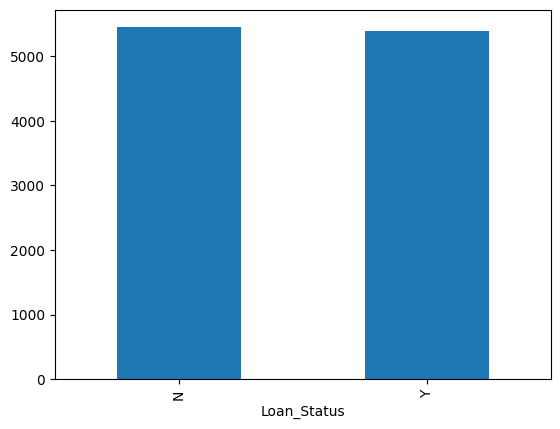

In [317]:

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

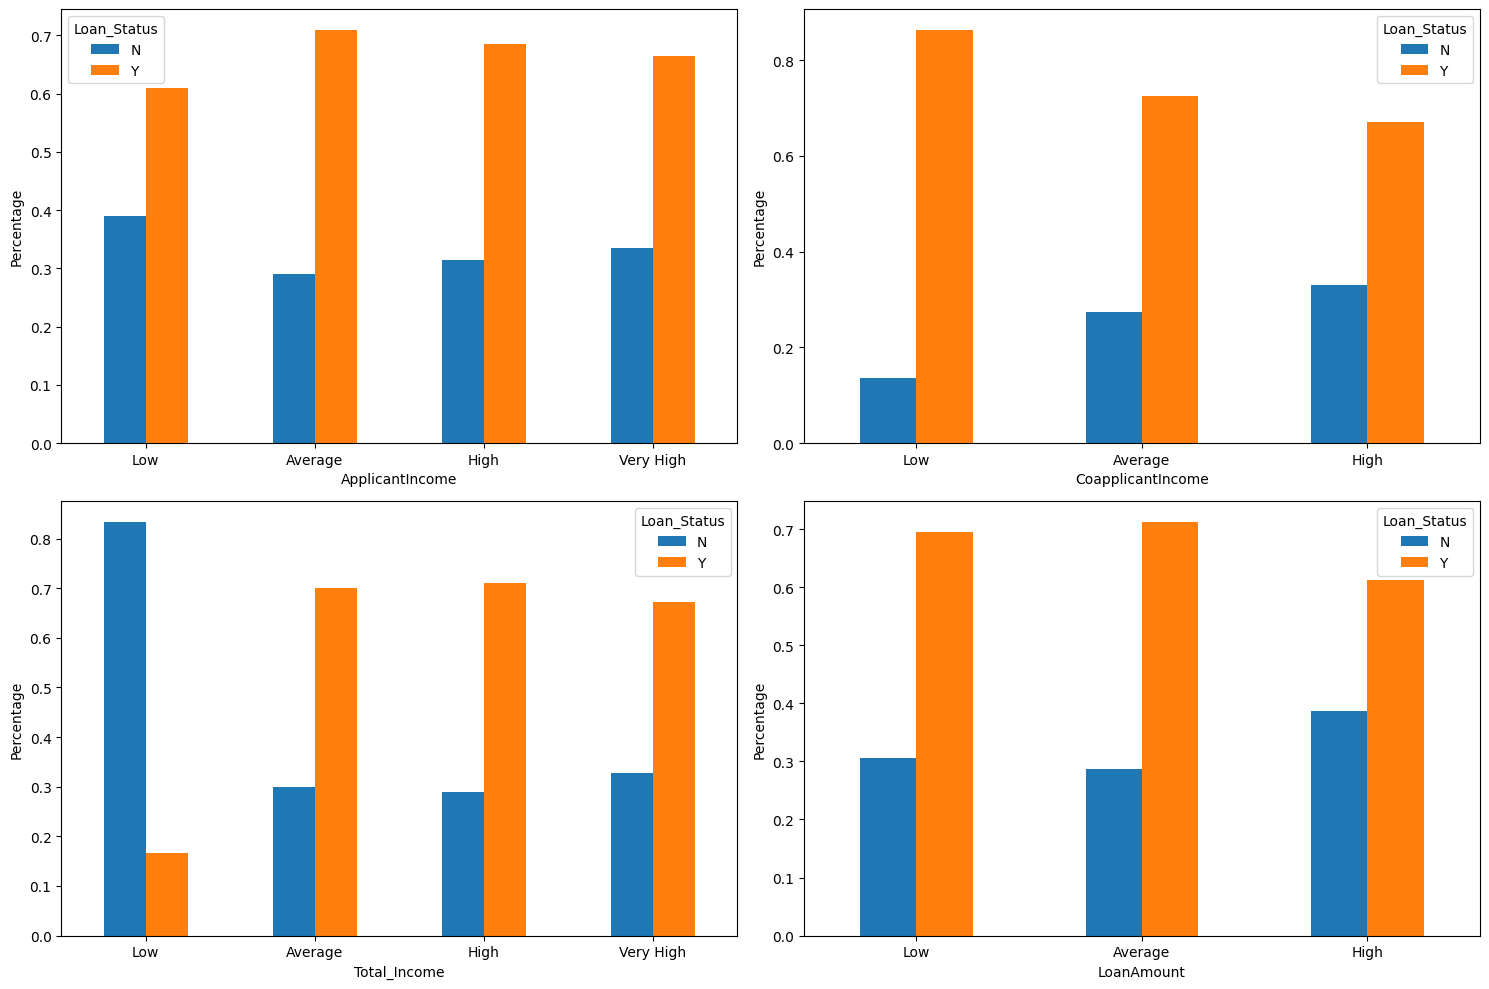

In [318]:
# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Applicant Income bins Vs Loan Status
bins = [0, 2000, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[0, 0], rot=0)
axes[0, 0].set_xlabel('ApplicantIncome')
axes[0, 0].set_ylabel('Percentage')

# Coapplicant Income bins Vs Loan Status
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[0, 1], rot=0)
axes[0, 1].set_xlabel('CoapplicantIncome')
axes[0, 1].set_ylabel('Percentage')

# Total Income Vs Loan_status
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2000, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[1, 0], rot=0)
axes[1, 0].set_xlabel('Total_Income')
axes[1, 0].set_ylabel('Percentage')

# Visualize Loan Amount Variable
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[1, 1], rot=0)
axes[1, 1].set_xlabel('LoanAmount')
axes[1, 1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()


In [319]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

# DATA PREPROCESSING

In [320]:
# Drop unnecessary columns
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [321]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [322]:
# Replace values in columns
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)



In [323]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Label Encoding

In [324]:

train['Loan_Status'] = train['Loan_Status'].map({'N': 0, 'Y': 1})

In [325]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


## Correlation Heatmap of all the numerical variables

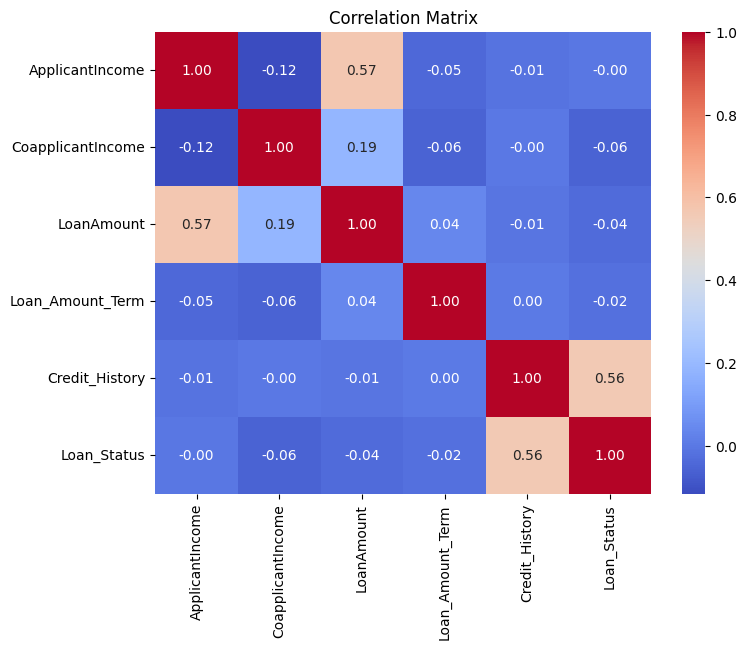

In [326]:

numeric_columns = train.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Finding Missing Values 

In [327]:

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Imputation
## Categorcal Variables: mode

In [328]:
 
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in columns_to_fill:
    train[col] = train[col].fillna(train[col].mode()[0])

## Imputation
## Numerical Variables: mean or median

In [329]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [330]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

## Loan Amount have outliers so we are using median to fill

In [331]:

train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [332]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Fill missing value in test data too

In [333]:
columns_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in columns_fill:
    test[col] = test[col].fillna(test[col].mode()[0])

In [334]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [335]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [336]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outliers Treatment

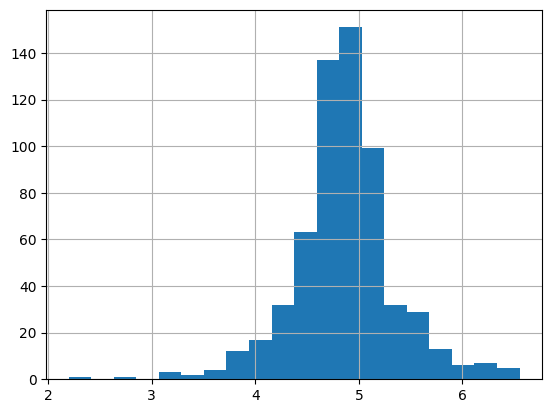

In [337]:

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Removing unwanted Feature

In [338]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [339]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

# One-hot encode categorical variables

In [340]:

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# FEATURE ENGINEERING AND MODELING

## Split our dataset into train and validation parts

In [341]:

X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=42)

## Scaling

In [342]:
# Z-Score normalization(mean 0,sd 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)


## 1. Logistic Regression

In [343]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=10000)

In [344]:
pred_cv = model.predict(X_cv_scaled)

## EVALUATION

In [345]:
accuracy = accuracy_score(y_cv,pred_cv)
precision = precision_score(y_cv,pred_cv)
recall = recall_score(y_cv,pred_cv)
f1 = f1_score(y_cv,pred_cv)
roc_auc = roc_auc_score(y_cv,pred_cv)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:",roc_auc)

Accuracy: 0.7837837837837838
Precision: 0.7564102564102564
Recall: 0.9833333333333333
F1 Score: 0.855072463768116
ROC AUC Score: 0.6993589743589743


## Prediction for our test dataset

In [346]:

pred_test = model.predict(test.values)


In [348]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_cv, pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

# Additional Metrics
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f2_score = (5 * precision * recall) / (4 * precision + recall)

print("Specificity:", specificity)
print("F2 Score:", f2_score)

Confusion Matrix:
[[ 27  38]
 [  2 118]]
Specificity: 0.4153846153846154
F2 Score: 0.9276729559748427


In [349]:
print(pred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


bias/underfitting/imbalance

# 2. Logistic Regression Using k-fold cross-validation

In [350]:

cv_scores = cross_val_score(model,X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation scores: [0.8372093  0.81395349 0.8255814  0.81395349 0.78823529]
Mean CV Score: 0.8157865937072504


## Visualize the roc curve
## Predict the probabilities of the validation set

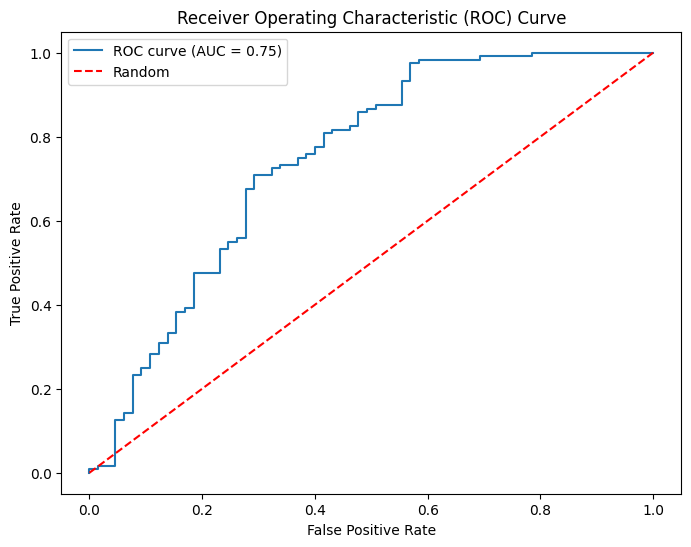

In [351]:

probs = model.predict_proba(X_cv_scaled)[:, 1]
# Calculate the False positive rate and True positive rate
fpr, tpr, _ = metrics.roc_curve(y_cv, probs)

#plot the roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_cv, probs)))
plt.plot([0, 1], [0, 1], linestyle='--', color='red',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature Engineering
##  Adding few new features

In [352]:
# Total Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

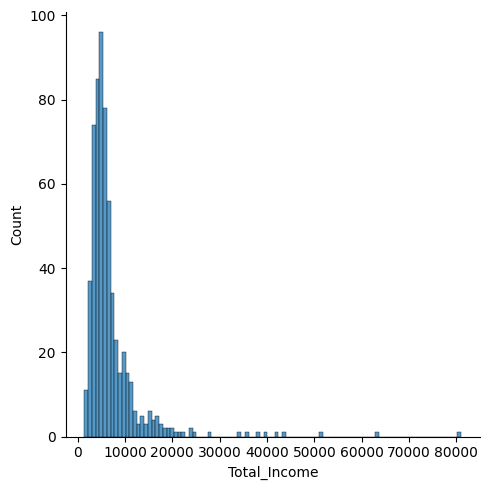

In [353]:
sns.displot(train['Total_Income'])

## The distribution is right Skewed, log transformation to make normal distribution

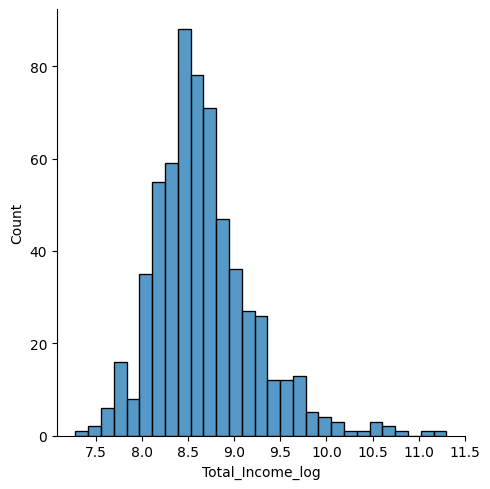

In [354]:

train['Total_Income_log'] = np.log(train['Total_Income'])
sns.displot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [355]:
#EMI
train['EMI']=train['LoanAmount']+train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']+test['Loan_Amount_Term']

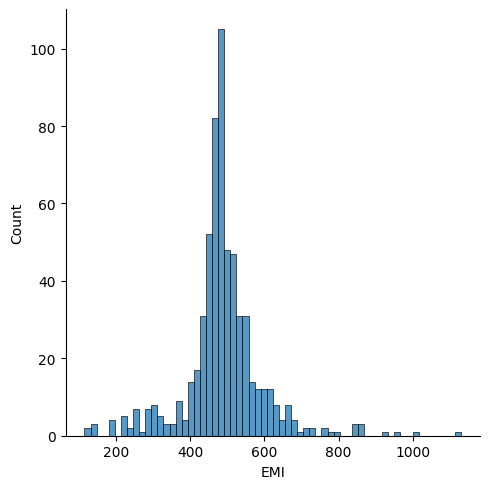

In [356]:
sns.displot(train['EMI'])

In [357]:
# Balance Income
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000) #Multiply with 1000 to make the units equal
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)

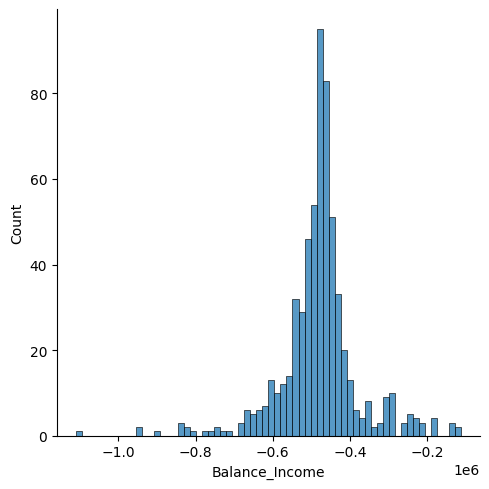

In [358]:
sns.displot(train['Balance_Income'])

In [359]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance_Income'],
      dtype='object')

## Drop the old varibles, to remove noise by removing correlated feature
## Correlation between old and new feature will be high,logistic regression assumes that the varibales are not highly correlated

In [360]:

train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)

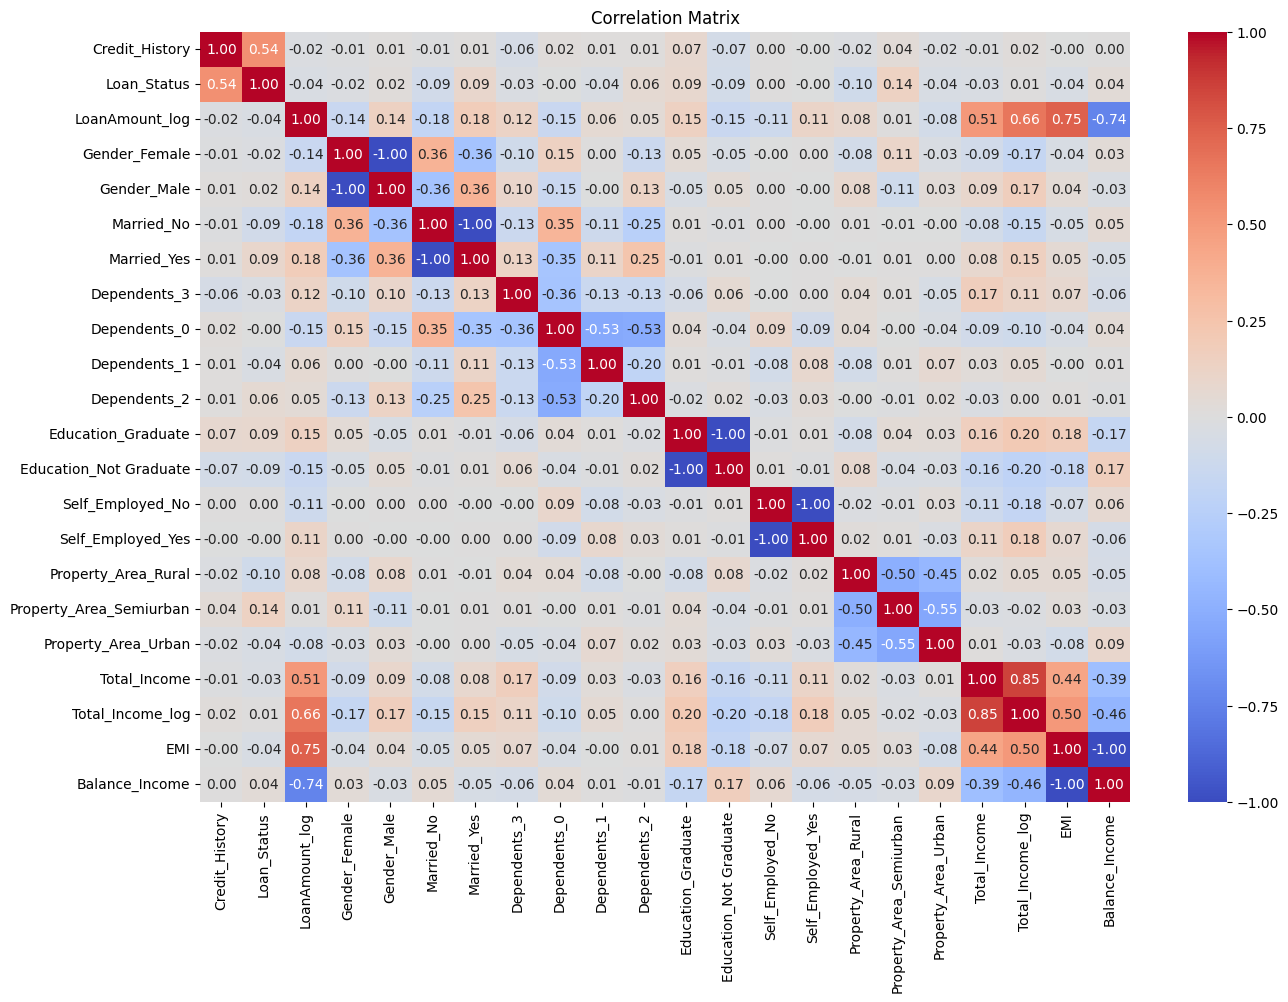

In [361]:
# Correlation Heatmap of all the numerical variables
numeric_columns = train.select_dtypes(include=['float64','int64','bool'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Model 2. Decision Tree Model

In [362]:

X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

In [363]:
# Split our dataset into training and validation parts
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=42)

In [364]:
model = DecisionTreeClassifier(random_state=1)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
model.fit(X_train_scaled, y_train)
pred_cv = model.predict(X_cv_scaled)
accuracy = accuracy_score(y_cv,pred_cv)
precision = precision_score(y_cv,pred_cv)
recall = recall_score(y_cv,pred_cv)
f1 = f1_score(y_cv,pred_cv)
roc_auc = roc_auc_score(y_cv,pred_cv)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:",roc_auc)
#Prediction for our test dataset
pred_test = model.predict(test.values)


Accuracy: 0.7243243243243244
Precision: 0.776
Recall: 0.8083333333333333
F1 Score: 0.7918367346938775
ROC AUC Score: 0.6887820512820513


## Cross Validation Scores

In [365]:
model = DecisionTreeClassifier(random_state=1)
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

model.fit(X, y) # Fit the model with entire dataset
pred_test = model.predict(test) # Make prediction on the test dataset

Cross-validation scores: [0.67479675 0.7398374  0.64227642 0.78861789 0.68032787]
Mean CV Score: 0.7051712648274023


In [366]:
print(pred_test)

[1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1]


mean validation accuracy lesser than Decision Tree model
So let's built Random Forest model

# MODEL 3. RANDOM FOREST MODEL

In [367]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

In [368]:
# Split our dataset into training and validation parts
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=1, max_depth=10)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
model.fit(X_train_scaled, y_train)
pred_cv = model.predict(X_cv_scaled)
accuracy = accuracy_score(y_cv,pred_cv)
precision = precision_score(y_cv,pred_cv)
recall = recall_score(y_cv,pred_cv)
f1 = f1_score(y_cv,pred_cv)
roc_auc = roc_auc_score(y_cv,pred_cv)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:",roc_auc)
#Prediction for our test dataset
pred_test = model.predict(test.values)

Accuracy: 0.8054054054054054
Precision: 0.78
Recall: 0.975
F1 Score: 0.8666666666666667
ROC AUC Score: 0.7336538461538462


## CROSS VALIDATION SCORES

In [369]:
# Random Forest
model = RandomForestClassifier(random_state=1, max_depth=10)
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Scores:", cv_scores.mean())

model.fit(X, y)
pred_test = model.predict(test)

Cross-validation scores: [0.77235772 0.76422764 0.76422764 0.82926829 0.80327869]
Mean CV Scores: 0.7866719978675196


Let's try to improve the accuracy by tuning the hyperparameters for this model

In [370]:
# Split our dataset into training and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# HYPERPARAMETER TUNING BY GRID SEARCH

In [371]:
# Tuning the hyperparameters
param_grid = {
    'max_depth': list(range(1, 20, 2)),
    'n_estimators': list(range(1, 200, 20))
}

model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

pred_test = grid_search.predict(X_test)

Best Parameters: {'max_depth': 5, 'n_estimators': 81}
Best Score: 0.818139534883721


In [372]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

# MODEL 4. RANDOM FOREST MODEL AFTER HYPERPARAMETER TUNING

In [373]:
# Split our dataset into training and validation parts
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=81)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
model.fit(X_train_scaled, y_train)
pred_cv = model.predict(X_cv_scaled)
accuracy = accuracy_score(y_cv,pred_cv)
precision = precision_score(y_cv,pred_cv)
recall = recall_score(y_cv,pred_cv)
f1 = f1_score(y_cv,pred_cv)
roc_auc = roc_auc_score(y_cv,pred_cv)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:",roc_auc)
#Prediction for our test dataset
pred_test = model.predict(test.values)

Accuracy: 0.7891891891891892
Precision: 0.7647058823529411
Recall: 0.975
F1 Score: 0.8571428571428571
ROC AUC Score: 0.7105769230769231


## CROSS VALIDATOIN SCORES

In [374]:
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=81)
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Scores:", cv_scores.mean())

model.fit(X, y)
pred_test = model.predict(test)

Cross-validation scores: [0.7804878  0.75609756 0.78861789 0.82113821 0.79508197]
Mean CV Scores: 0.7882846861255498


# Feature Importance

<Axes: >

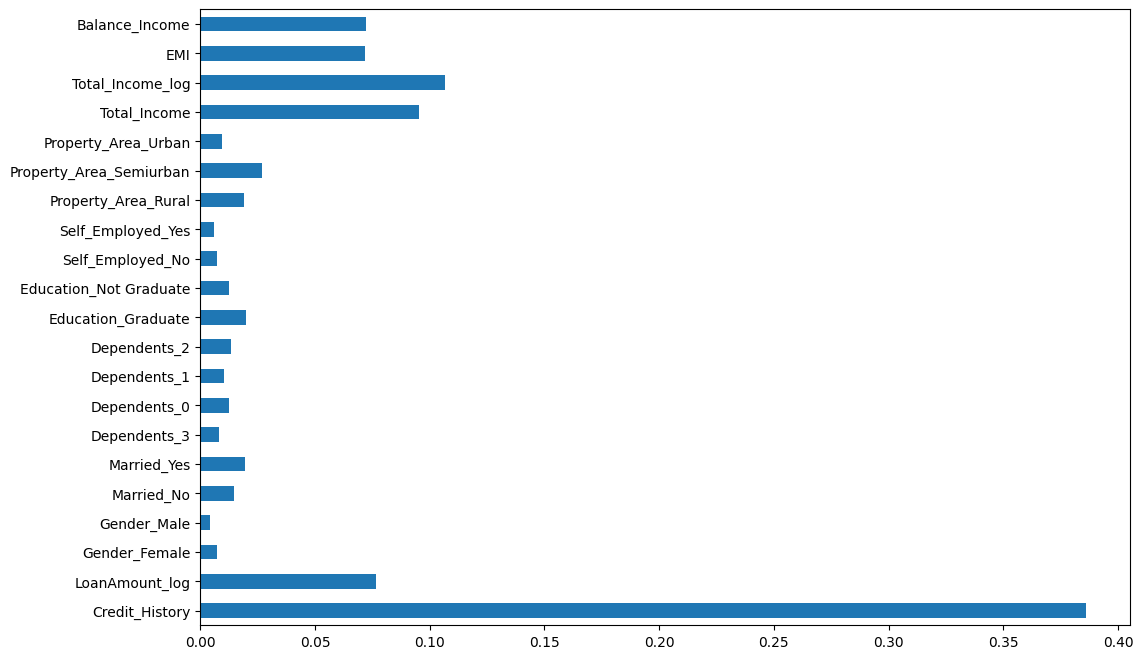

In [375]:


importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [376]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
      dtype='object')

In [377]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,1,4.852030,False,True,True,False,False,True,False,...,False,True,False,False,False,True,5849.0,8.674026,488.0,-482151.0
1,1.0,0,4.852030,False,True,False,True,False,False,True,...,False,True,False,True,False,False,6091.0,8.714568,488.0,-481909.0
2,1.0,1,4.189655,False,True,False,True,False,True,False,...,False,False,True,False,False,True,3000.0,8.006368,426.0,-423000.0
3,1.0,1,4.787492,False,True,False,True,False,True,False,...,True,True,False,False,False,True,4941.0,8.505323,480.0,-475059.0
4,1.0,1,4.948760,False,True,True,False,False,True,False,...,False,True,False,False,False,True,6000.0,8.699515,501.0,-495000.0


# MODEL 5. GRADUATE / NOT GRADUATE MODEL(RANDOM FOREST CLASSIFIER)

In [378]:
graduate_data = train[train['Education_Graduate'] == 1]
not_graduate_data = train[train['Education_Not Graduate'] ==1]

# Preprocess data for graduate customer
X_graduate = graduate_data.drop(columns=['Loan_Status'])
y_graduate = graduate_data['Loan_Status']

# Preprocess data for not-graduate customer
X_not_graduate = not_graduate_data.drop(columns=['Loan_Status'])
y_not_graduate = not_graduate_data['Loan_Status']

# Train model for graduate customers
model_graduate = RandomForestClassifier(random_state=1, max_depth=10)
model_graduate.fit(X_graduate, y_graduate)

# Train model for not-graduate customers
model_not_graduate = RandomForestClassifier(random_state=1, max_depth=10)
model_not_graduate.fit(X_not_graduate, y_not_graduate)

pred_test_graduate = model_graduate.predict(test[test['Education_Graduate'] == 1])


pred_test_not_graduate = model_not_graduate.predict(test[test['Education_Not Graduate'] == 1])


In [379]:
test.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance_Income'],
      dtype='object')

In [380]:
model_graduate = RandomForestClassifier(random_state=5, max_depth=81)
model_not_graduate = RandomForestClassifier(random_state=5, max_depth=81)

cv_scores_graduate = cross_val_score(model_graduate, X_graduate, y_graduate, cv=5)
print("Cross-validation scores:", cv_scores_graduate)
print("Mean CV Scores:", cv_scores_graduate.mean())

cv_scores_not_graduate = cross_val_score(model_not_graduate, X_not_graduate, y_not_graduate, cv=5)
print("Cross-validation scores:", cv_scores_not_graduate)
print("Mean CV Scores:", cv_scores_not_graduate.mean())

model_graduate.fit(X_graduate,y_graduate)
pred_test_graduate = model_graduate.predict(test[test['Education_Graduate'] == 1])


model_not_graduate.fit(X_not_graduate,y_not_graduate)
pred_test_not_graduate = model_not_graduate.predict(test[test['Education_Not Graduate'] == 1])



Cross-validation scores: [0.75       0.79166667 0.78125    0.8125     0.82291667]
Mean CV Scores: 0.7916666666666666
Cross-validation scores: [0.7037037  0.55555556 0.7037037  0.77777778 0.61538462]
Mean CV Scores: 0.6712250712250712


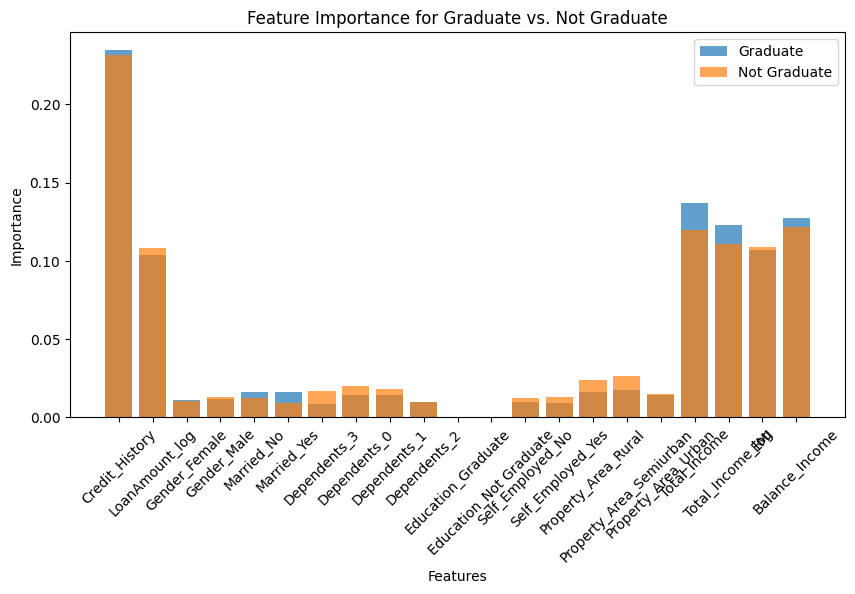

In [381]:
#Feature Importance
feature_importance_graduate = model_graduate.feature_importances_
feature_importance_not_graduate = model_not_graduate.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.bar(X_graduate.columns, feature_importance_graduate, label='Graduate', alpha=0.7)
plt.bar(X_not_graduate.columns, feature_importance_not_graduate, label='Not Graduate', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Graduate vs. Not Graduate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [382]:
train['Education_Graduate'].value_counts()

Education_Graduate
True     480
False    134
Name: count, dtype: int64

# MODEL 6. GRADUATE / NOT GRADUATE MODEL(GRADIENT BOOSTING CLASSIFIER) 

In [383]:
# GradientBoostingClassifier_
model_graduate_gb = GradientBoostingClassifier(random_state=1, max_depth=5, n_estimators=81)


cv_scores_graduate_gb = cross_val_score(model_graduate_gb, X_graduate, y_graduate, cv=5)
print("Cross-validation scores:", cv_scores_graduate_gb)
print("Mean CV Scores:", cv_scores_graduate_gb.mean())
model_graduate_gb.fit(X_graduate,y_graduate)



Cross-validation scores: [0.73958333 0.76041667 0.79166667 0.82291667 0.79166667]
Mean CV Scores: 0.7812499999999999


GradientBoostingClassifier(max_depth=5, n_estimators=81, random_state=1)

In [384]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Cross-validation scores
cv_scores_graduate_gb = cross_val_score(model_graduate_gb, X_graduate, y_graduate, cv=5)
print("Cross-validation scores:", cv_scores_graduate_gb)
print("Mean CV Score:", cv_scores_graduate_gb.mean())

# Fit the model and make predictions
model_graduate_gb.fit(X_graduate, y_graduate)
y_pred = model_graduate_gb.predict(X_graduate)

# Evaluation metrics
accuracy = accuracy_score(y_graduate, y_pred)
precision = precision_score(y_graduate, y_pred)
recall = recall_score(y_graduate, y_pred)
f1 = f1_score(y_graduate, y_pred)
roc_auc = roc_auc_score(y_graduate, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_graduate, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Cross-validation scores: [0.73958333 0.76041667 0.79166667 0.82291667 0.79166667]
Mean CV Score: 0.7812499999999999
Accuracy: 0.9833333333333333
Precision: 0.9770114942528736
Recall: 1.0
F1 Score: 0.9883720930232558
ROC AUC Score: 0.9714285714285714
Confusion Matrix:
[[132   8]
 [  0 340]]


In [385]:
model_not_graduate_gb = GradientBoostingClassifier(random_state=1, max_depth=5, n_estimators=81)
cv_scores_not_graduate_gb = cross_val_score(model_not_graduate_gb, X_not_graduate, y_not_graduate, cv=5)
print("Cross-validation scores:", cv_scores_not_graduate_gb)
print("Mean CV Scores:", cv_scores_not_graduate_gb.mean())
model_not_graduate_gb.fit(X_not_graduate,y_not_graduate)

#accuracy_score(y_cv,pred_cv)


Cross-validation scores: [0.74074074 0.59259259 0.77777778 0.66666667 0.57692308]
Mean CV Scores: 0.6709401709401709


GradientBoostingClassifier(max_depth=5, n_estimators=81, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Cross-validation scores
cv_scores_not_graduate_gb = cross_val_score(model_not_graduate_gb, X_not_graduate, y_not_graduate, cv=5)
print("Cross-validation scores:", cv_scores_not_graduate_gb)
print("Mean CV Scores:", cv_scores_not_graduate_gb.mean())

# Fit the model and make predictions
model_not_graduate_gb.fit(X_not_graduate, y_not_graduate)
y_pred_not_graduate = model_not_graduate_gb.predict(X_not_graduate)

# Evaluation metrics
accuracy_not_graduate = accuracy_score(y_not_graduate, y_pred_not_graduate)
precision_not_graduate = precision_score(y_not_graduate, y_pred_not_graduate)
recall_not_graduate = recall_score(y_not_graduate, y_pred_not_graduate)
f1_not_graduate = f1_score(y_not_graduate, y_pred_not_graduate)
roc_auc_not_graduate = roc_auc_score(y_not_graduate, y_pred_not_graduate)

print("Accuracy:", accuracy_not_graduate)
print("Precision:", precision_not_graduate)
print("Recall:", recall_not_graduate)
print("F1 Score:", f1_not_graduate)
print("ROC AUC Score:", roc_auc_not_graduate)

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix_not_graduate = confusion_matrix(y_not_graduate, y_pred_not_graduate)
print("Confusion Matrix:")
print(conf_matrix_not_graduate)


Cross-validation scores: [0.74074074 0.59259259 0.77777778 0.66666667 0.57692308]
Mean CV Scores: 0.6709401709401709
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[52  0]
 [ 0 82]]


2024-04-26 07:30:35,769 - INFO     - Executing shutdown due to inactivity...
2024-04-26 07:30:35,798 - INFO     - Executing shutdown...
2024-04-26 07:30:35,799 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
